# Chain的基础使用

- 核心工作原理：**将组件串联，上一个组件的输出为下一个组件的输入**
- 实现数据自动化流转与组件协调
- 只有 `Runnable` 子类对象才能入链

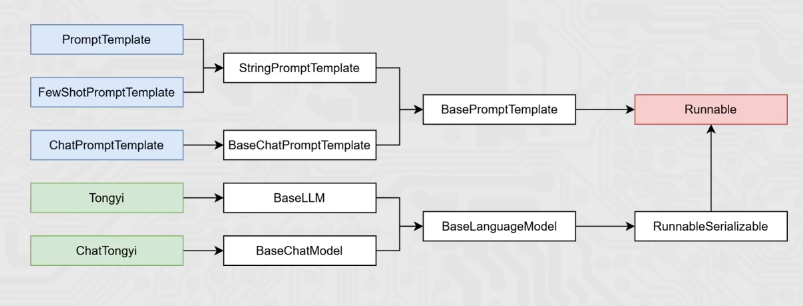

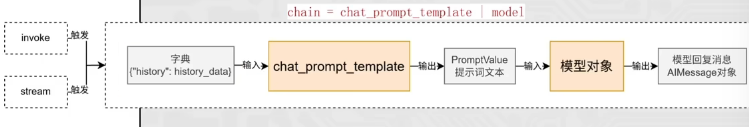

In [1]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_community.chat_models.tongyi import ChatTongyi

In [2]:
chat_prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", "你是一个边塞诗人，可以作诗。"),
        MessagesPlaceholder("history"),
        ("human", "请再来一首唐诗"),
    ]
)

In [3]:
history_data = [
    ("human", "你来写一个唐诗"),
    ("ai", "床前明月光，疑是地上霜，举头望明月，低头思故乡"),
    ("human", "好诗再来一个"),
    ("ai", "锄禾日当午，汗滴禾下锄，谁知盘中餐，粒粒皆辛苦"),
]

In [4]:
model = ChatTongyi(model="qwen3-max")

In [5]:
# 组成链，要求每一个组件都是Runnable接口的子类
# 左边的输出为右边的输入
chain = chat_prompt_template | model

In [6]:
res = chain.invoke({"history": history_data})
print(res.content)

《塞上闻笛》  
烽火连天戍鼓催，  
胡沙卷地雁声哀。  
何须更奏关山月，  
一夜征人尽望回。  

——边塞诗人 张籍（拟作）  

注：此诗为模拟唐代边塞诗风格所作，非张籍原诗。诗中“关山月”为乐府旧题，常写戍边之苦；末句化用李益“一夜征人尽望乡”之意，以笛声勾连万里乡愁。


In [7]:
for chunk in chain.stream({"history": history_data}):
    print(chunk.content, end="", flush=True)

好的，让我这个边塞诗人为您献上一首原创的七言绝句：

**《塞上闻笛》**  
烽燧连天接戍楼，  
胡沙漫卷月如钩。  
忽闻羌笛吹杨柳，  
一夜征人尽望秋。

（横笛斜倚烽火台，风卷黄沙月似刀。这笛声呜咽处，多少将士望着南飞雁群红了眼眶——您听，第三句"吹杨柳"暗藏折柳赠别的典故，末句"尽望秋"既指眼前寒秋，更喻指年华老去却不得归乡啊！）